<a href="https://colab.research.google.com/github/Shahid-TheMatrixMaker/100-Data-Science-Project/blob/main/Predictive_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load the titanic dataset
data = pd.read_csv('titanic.csv')

**Predictive modeling and machine learning**

In [4]:
data.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [6]:
data.describe()

PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000

In [7]:
data.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [8]:
# Preprocess the data
# ... (Code for data preprocessing, handling missing values, categorical encoding, etc.)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Initialize the model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5952380952380952


**Data exploration and preprocessing of the titanic dataset**

In [1]:
# Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
data = pd.read_csv('titanic.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [2]:
# Examine the structure of the dataset
print("Dataset structure:")
print(data.info())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
# Analyze the distribution of the target variable
print("\nSurvived distribution:")
print(data['Survived'].value_counts())


Survived distribution:
Survived
0    549
1    342
Name: count, dtype: int64


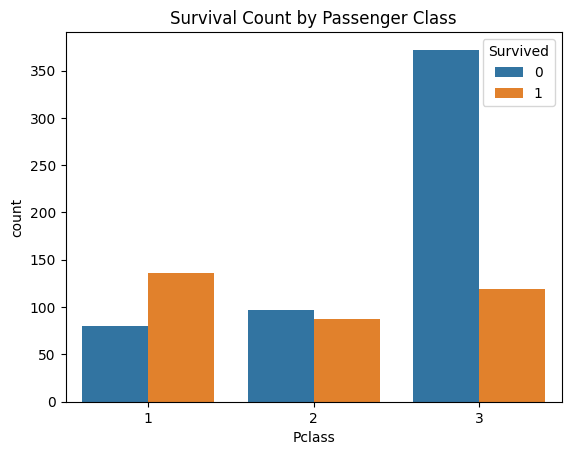

In [4]:
# Explore relationships between features and survival
# Example: Relationship between passenger class and survival
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Passenger Class')
plt.show()

In [5]:
# Address missing values
print("\nMissing values:")
print(data.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Handle missing values (example: filling missing age values with the mean)
data['Age'].fillna(data['Age'].mean(), inplace=True)

# Address outliers (example: remove outliers in fare column using Z-score)
z_score = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()
data = data.loc[z_score.abs() < 3]

# Handle categorical variables (example: one-hot encoding for 'Sex' column)
data_encoded = pd.get_dummies(data, columns=['Sex'])

# Perform feature scaling (example: standardization of 'Age' and 'Fare' columns)
data_encoded['Age'] = (data_encoded['Age'] - data_encoded['Age'].mean()) / data_encoded['Age'].std()
data_encoded['Fare'] = (data_encoded['Fare'] - data_encoded['Fare'].mean()) / data_encoded['Fare'].std()

# Final preprocessed dataset
print("\nPreprocessed dataset:")
print(data_encoded.head())


Preprocessed dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.588813      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.639674      1      0   
2                             Heikkinen, Miss. Laina -0.281691      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.409333      1      0   
4                           Allen, Mr. William Henry  0.409333      0      0   

             Ticket      Fare Cabin Embarked  Sex_female  Sex_male  
0         A/5 21171 -0.656879   NaN        S       False      True  
1          PC 17599  1.524747   C85        C        True     False  
2  STON/O2. 3101282 -0.633881   NaN        S        True     False  
3  

<ipython-input-6-59274862cce7>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)


**Model selection and evaluation of the titanic dataset**

In [7]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [8]:
# Preprocess the data (example: one-hot encoding for categorical variables)
data = pd.get_dummies(data)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Initialize and train different models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

for model_name, model in models.items():
    print(f"Model: {model_name}")
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

Model: Logistic Regression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7657142857142857
Precision: 0.7285714285714285
Recall: 0.6986301369863014
F1-Score: 0.7132867132867133
Model: Decision Tree
Accuracy: 0.8114285714285714
Precision: 0.803030303030303
Recall: 0.726027397260274
F1-Score: 0.762589928057554
Model: Random Forest
Accuracy: 0.7885714285714286
Precision: 0.8333333333333334
Recall: 0.6164383561643836
F1-Score: 0.7086614173228346
Model: Support Vector Machine
Accuracy: 0.6114285714285714
Precision: 0.8571428571428571
Recall: 0.0821917808219178
F1-Score: 0.15


**Model training and hyperparameter tuning of the titanic dataset**

In [9]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Initialize and train the models
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)

# Evaluate the models
logistic_regression_score = logistic_regression.score(X_test, y_test)
decision_tree_score = decision_tree.score(X_test, y_test)
random_forest_score = random_forest.score(X_test, y_test)

print(f"Logistic Regression Score: {logistic_regression_score}")
print(f"Decision Tree Score: {decision_tree_score}")
print(f"Random Forest Score: {random_forest_score}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Score: 0.7657142857142857
Decision Tree Score: 0.8114285714285714
Random Forest Score: 0.7942857142857143


In [10]:
# Hyperparameter tuning using Grid Search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

decision_tree_grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
decision_tree_grid.fit(X_train, y_train)

best_params_grid = decision_tree_grid.best_params_
best_score_grid = decision_tree_grid.best_score_

print("Grid Search - Decision Tree")
print(f"Best Parameters: {best_params_grid}")
print(f"Best Score: {best_score_grid}")


# Hyperparameter tuning using Random Search
param_dist = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'criterion': ['gini', 'entropy']
}

decision_tree_random = RandomizedSearchCV(DecisionTreeClassifier(), param_dist, cv=5, n_iter=10, random_state=42)
decision_tree_random.fit(X_train, y_train)

best_params_random = decision_tree_random.best_params_
best_score_random = decision_tree_random.best_score_

print("Random Search - Decision Tree")
print(f"Best Parameters: {best_params_random}")
print(f"Best Score: {best_score_random}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Grid Search - Decision Tree
Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: 0.8290544707091471
Random Search - Decision Tree
Best Parameters: {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}
Best Score: 0.8218807810894141


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


**Deployment of the predictive models**

In [11]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('Survived', axis=1), data['Survived'], test_size=0.2, random_state=42)

# Train a Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Save the trained model
joblib.dump(random_forest, 'random_forest_model.pkl')

# Load the saved model
loaded_model = joblib.load('random_forest_model.pkl')

# Make predictions using the loaded model
predictions = loaded_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Analyze feature importance
feature_importance = loaded_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance_df)

Accuracy: 0.8228571428571428
Feature Importance:
                            Feature  Importance
878                        Sex_male    0.102294
877                      Sex_female    0.075056
5                              Fare    0.066643
2                               Age    0.051611
0                       PassengerId    0.043022
...                             ...         ...
920                   Ticket_113788    0.000000
924                   Ticket_113796    0.000000
1410              Ticket_A/5. 13032    0.000000
1408                Ticket_A/5 3902    0.000000
555   Name_Moutal, Mr. Rahamin Haim    0.000000

[1692 rows x 2 columns]
